In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset/Resume/Resume.csv')

In [3]:
data_top = data.tail()
data_top 

,ID,Resume_str,Resume_html,Category
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2483,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [45]:
ID = 111111111
result = data[data['ID'] == ID]
print(result)

Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []


In [42]:
list(data.columns)

['ID', 'Resume_str', 'Resume_html', 'Category']

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None

Missing Values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

Descriptive Statistics:
                 ID
count  2.484000e+03
mean   3.182616e+07
std    2.145735e+07
min    3.547447e+06
25%    1.754430e+07
50%    2.521031e+07
75%    3.611444e+07
max    9.980612e+07


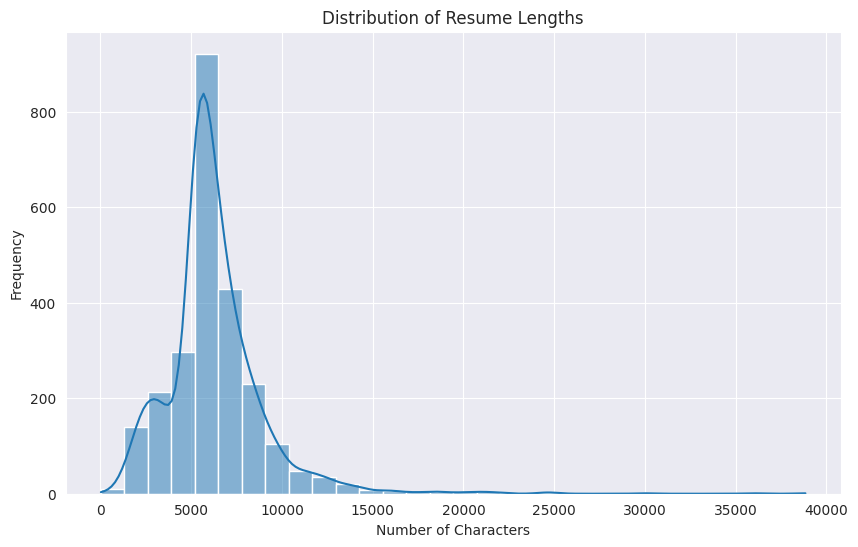

[nltk_data] Downloading package stopwords to /home/abs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


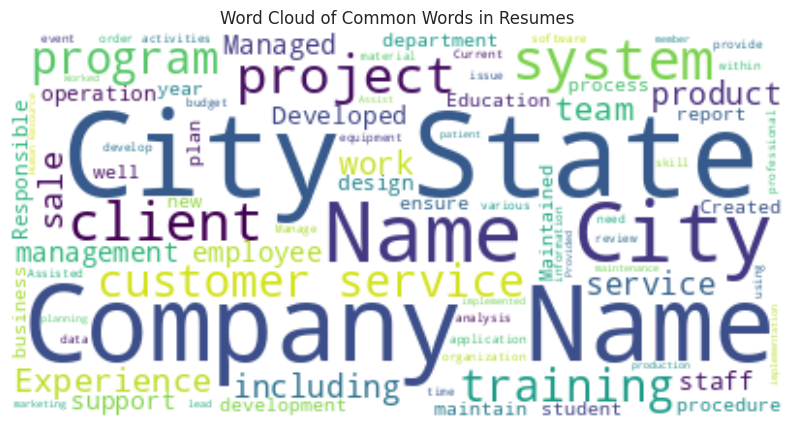

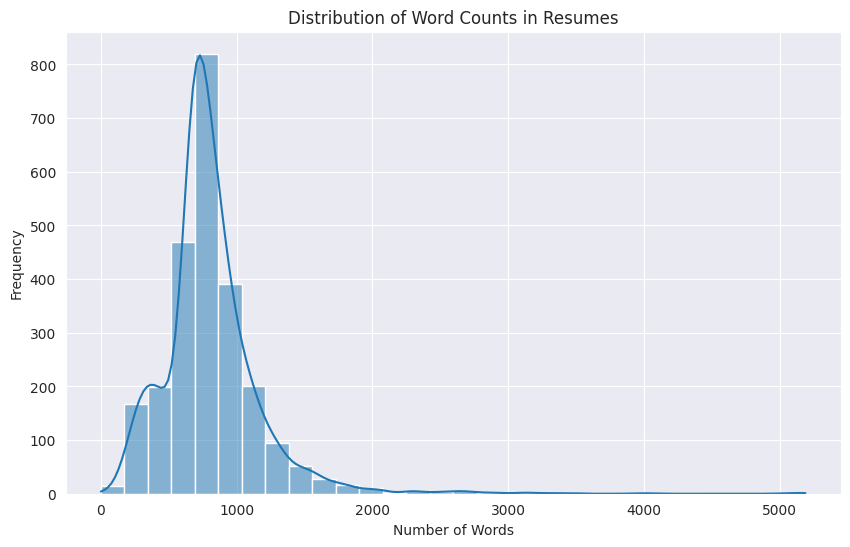

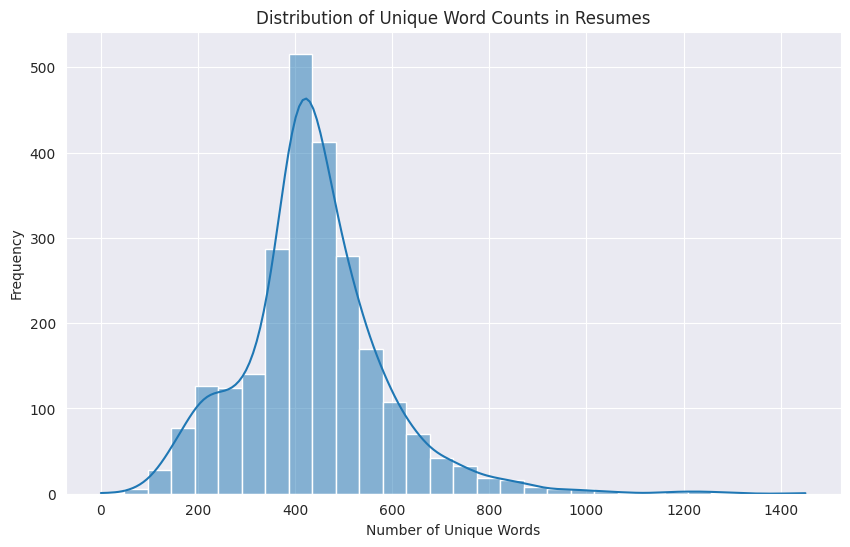

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Load the CSV file
df = pd.read_csv('dataset/Resume/Resume.csv')

# Display basic information about the data
print("Data Summary:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics for numeric columns (if any)
print("\nDescriptive Statistics:")
print(df.describe())

# Distribution of resume lengths
df['resume_length'] = df['Resume_str'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['resume_length'], bins=30, kde=True)
plt.title('Distribution of Resume Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Word Cloud for most common words in resumes
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + list(string.punctuation))
text = " ".join(resume for resume in df.Resume_str)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Common Words in Resumes")
plt.show()

# Distribution of words per resume
df['word_count'] = df['Resume_str'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Resumes')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of unique words per resume
df['unique_word_count'] = df['Resume_str'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['unique_word_count'], bins=30, kde=True)
plt.title('Distribution of Unique Word Counts in Resumes')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()


# Explore Resume Categories

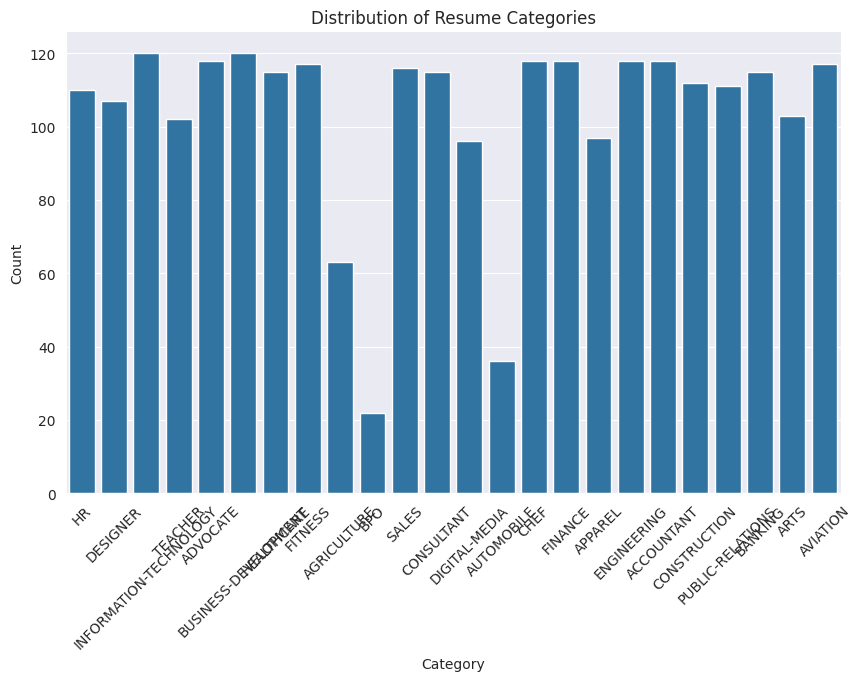

In [10]:
# Distribution of resume categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Resume Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Text Analysis
Word Frequency Analysis

/tmp/ipykernel_11448/2478448070.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df.head(20), x='Frequency', y='Word', palette='viridis')


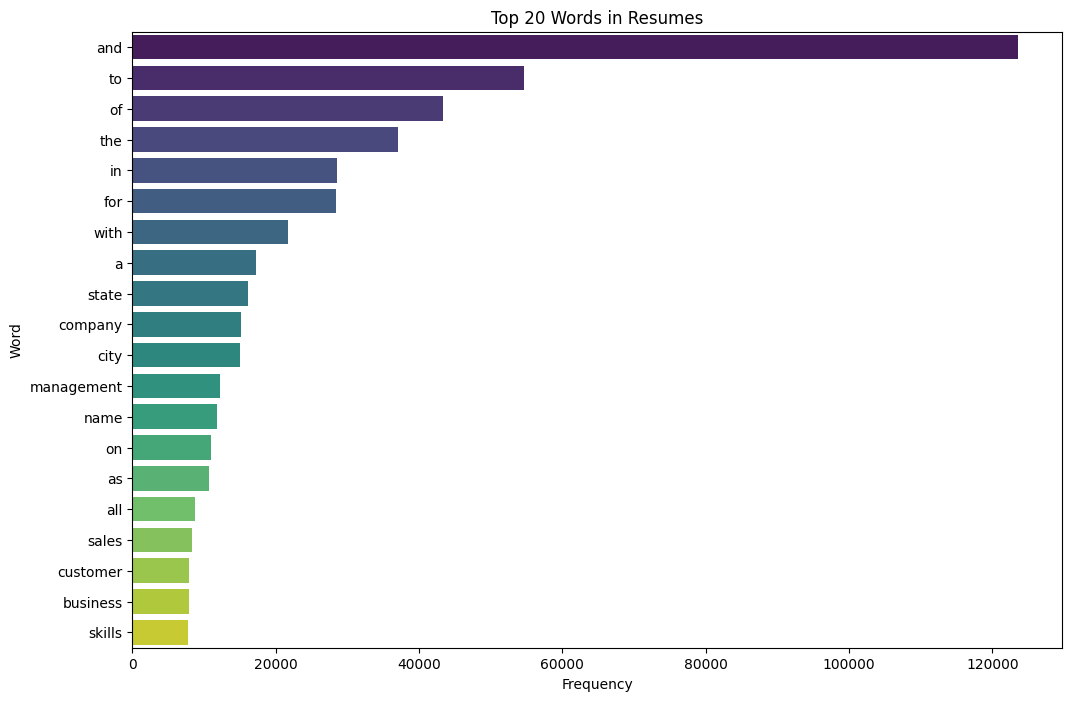

In [12]:
from collections import Counter
import re

# Combine all resumes into a single string
all_text = ' '.join(df['Resume_str'])

# Tokenize and clean text
words = re.findall(r'\b\w+\b', all_text.lower())

# Count word frequencies
word_freq = Counter(words)

# Convert to DataFrame for easier plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot top 20 words
plt.figure(figsize=(12, 8))
sns.barplot(data=word_freq_df.head(20), x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Words in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Text Length Analysis

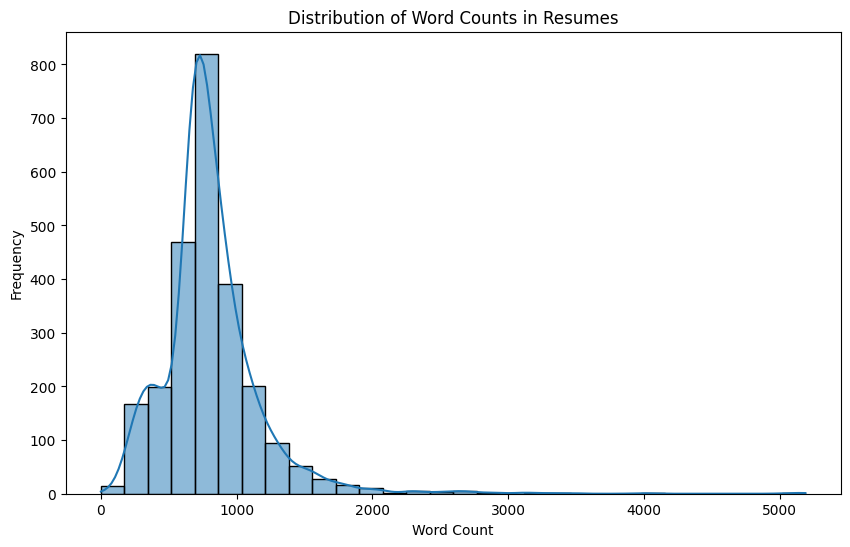

In [13]:
df['word_count'] = df['Resume_str'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Resumes')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


# Feature Engineering

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Resume_str'])


# Sentiment Analysis

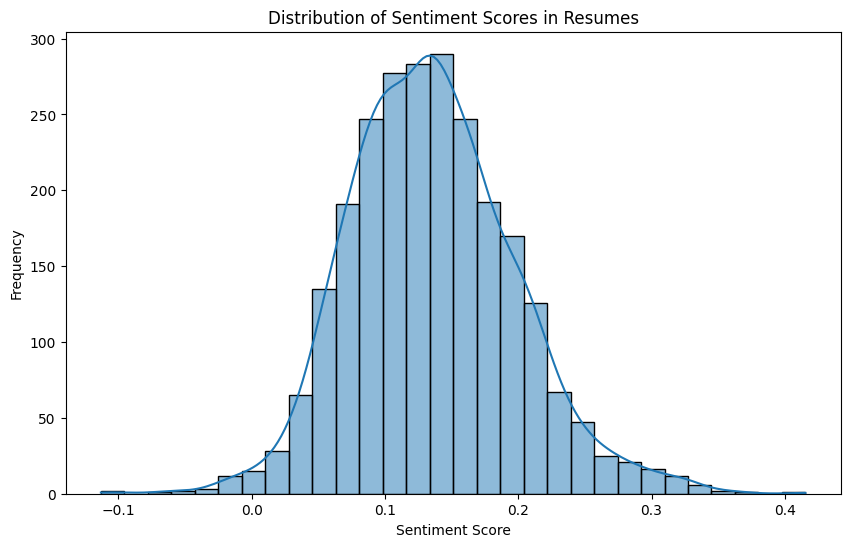

In [16]:
from textblob import TextBlob

df['sentiment'] = df['Resume_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores in Resumes')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Model Training

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report



# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Resume_str'], df['Category'], test_size=0.3, random_state=42)

# Create a pipeline with TF-IDF and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.62      0.89      0.73        37
              ADVOCATE       0.34      0.32      0.33        37
           AGRICULTURE       0.00      0.00      0.00        15
               APPAREL       0.75      0.10      0.18        29
                  ARTS       0.25      0.03      0.06        29
            AUTOMOBILE       0.00      0.00      0.00        11
              AVIATION       0.68      0.60      0.64        35
               BANKING       0.49      0.66      0.56        29
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.32      0.77      0.45        35
                  CHEF       0.85      0.70      0.77        40
          CONSTRUCTION       0.95      0.49      0.65        43
            CONSULTANT       0.50      0.06      0.11        33
              DESIGNER       0.90      0.58      0.70        33
         DIGITAL-MEDIA       1.00      

# Advanced Analysis

In [21]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

# Apply NER
doc = nlp(' '.join(df['Resume_str'].sample(1).values))
displacy.render(doc, style='ent', jupyter=True)


# Processing

In [22]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Text Preprocessing Function
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to resumes
df['processed_resume'] = df['Resume_str'].apply(preprocess_text)

# Tokenization & Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_resume'])

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)


# Classical Model Training and Eval

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=0))


# Support Vector Machine
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))


Logistic Regression Accuracy: 0.6438631790744467
                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.86      0.85        29
              ADVOCATE       0.53      0.60      0.56        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.56      0.45      0.50        20
                  ARTS       0.17      0.17      0.17        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.75      0.86      0.80        21
               BANKING       0.77      0.74      0.76        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.78      0.52      0.62        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.90      0.76      0.83        34
            CONSULTANT       0.50      0.30      0.38        20
              DESIGNER       0.75      0.79      0.77 

# RF Hyperparameter tuning

In [26]:
# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf, zero_division=0))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuned Random Forest Accuracy: 0.6861167002012073
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.93      0.84        29
              ADVOCATE       0.81      0.70      0.75        30
           AGRICULTURE       0.67      0.25      0.36         8
               APPAREL       0.69      0.45      0.55        20
                  ARTS       0.20      0.06      0.09        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.83      0.90      0.86        21
               BANKING       0.73      0.70      0.71        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.76      0.48      0.59        27
                  CHEF       0.86      0.79      0.83        24
          CONSTRUCTION       0.88      0.88      0.88        34
            CONSULTANT       0.64      0.35      0.45    

# Deep Learning Approach

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
import numpy as np

# Assuming 'processed_resume' is your tokenized text data and 'Category' is the label

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Category'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['processed_resume'], df['label'], test_size=0.2, random_state=42)

# Vocabulary and GloVe embeddings
glove = GloVe(name='6B', dim=100)
word2idx = {word: i+2 for i, word in enumerate(glove.itos)}  # +2 to reserve indices 0 and 1 for padding and unknown words
word2idx['<pad>'] = 0
word2idx['<unk>'] = 1
idx2word = {i: word for word, i in word2idx.items()}

# Convert text to indices
def text_to_indices(text):
    return [word2idx.get(word, word2idx['<unk>']) for word in text]

X_train_indices = [text_to_indices(text) for text in X_train]
X_test_indices = [text_to_indices(text) for text in X_test]

# Padding sequences
X_train_pad = pad_sequence([torch.tensor(seq) for seq in X_train_indices], batch_first=True, padding_value=0)
X_test_pad = pad_sequence([torch.tensor(seq) for seq in X_test_indices], batch_first=True, padding_value=0)

# Determine max_len based on the length of the padded sequences
max_len = X_train_pad.size(1)

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)


In [33]:
# Dataloader
class ResumeDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

train_dataset = ResumeDataset(X_train_pad, y_train_tensor)
test_dataset = ResumeDataset(X_test_pad, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [36]:
# Model

class ResumeClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, max_len):
        super(ResumeClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(embed_dim, 64, kernel_size=5)
        self.pool = nn.MaxPool1d(2)
        # Correctly calculate the flattened dimension
        conv_output_len = (max_len - 4) // 2
        self.fc1 = nn.Linear(64 * conv_output_len, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)  # Change shape for conv1d: (batch_size, embed_dim, max_len)
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Hyperparameters
vocab_size = len(word2idx)
embed_dim = 100
num_classes = len(label_encoder.classes_)

model = ResumeClassifier(vocab_size, embed_dim, num_classes, max_len)



In [37]:
#Train Model

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    for texts, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


Epoch 1/10, Loss: 3.133787155151367
Epoch 2/10, Loss: 3.1747467517852783
Epoch 3/10, Loss: 3.2368662357330322
Epoch 4/10, Loss: 3.135944366455078
Epoch 5/10, Loss: 3.143108367919922
Epoch 6/10, Loss: 3.1802597045898438
Epoch 7/10, Loss: 3.162224531173706
Epoch 8/10, Loss: 3.174783706665039
Epoch 9/10, Loss: 3.1340057849884033
Epoch 10/10, Loss: 3.1261789798736572


In [ ]:
#Evaluate the model

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')


# View the categorized resumes

In [1]:
import pandas as pd
updated_resume_csv = pd.read_csv('dataset/Resume/Updated_Resume.csv')

In [2]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv('dataset/Resume/Resume.csv')
df2 = pd.read_csv('dataset/Resume/Updated_Resume.csv')

# Merge the two DataFrames to find differences
merged_df = pd.merge(df1, df2, how='outer', indicator=True)

# Find rows that are only in one of the DataFrames
only_in_df1 = merged_df[merged_df['_merge'] == 'left_only']
only_in_df2 = merged_df[merged_df['_merge'] == 'right_only']

# Print the results
print("Rows only in the first CSV file:")
print(only_in_df1)

print("\nRows only in the second CSV file:")
print(only_in_df2)


Rows only in the first CSV file:
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category, Predicted_Category, _merge]
Index: []

Rows only in the second CSV file:
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category, Predicted_Category, _merge]
Index: []
